Read Data

In [4]:
import pandas as pd
df = pd.read_csv('heart failure.csv')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Info of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Data Visualization

In [7]:
import seaborn as sns

In [9]:
df['DEATH_EVENT'].value_counts() #how many instances of each class

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Checking balanced or imbalanced

In [10]:
96/(203+96)

0.3210702341137124

Since 68%, 32%, so data is not entirely imbalanced.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

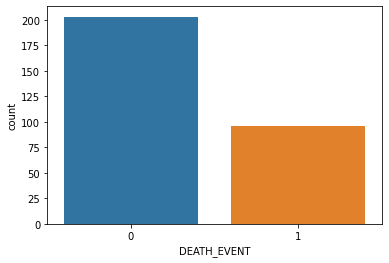

In [12]:
sns.countplot(x='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='count', ylabel='DEATH_EVENT'>

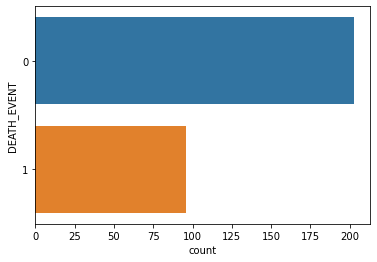

In [13]:
sns.countplot(y='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='count', ylabel='diabetes'>

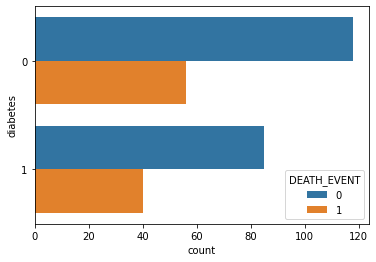

In [15]:
sns.countplot(y='diabetes',data=df, hue = 'DEATH_EVENT')#when the count of observances with respect to another features is need, hue is used.

<AxesSubplot:xlabel='diabetes', ylabel='count'>

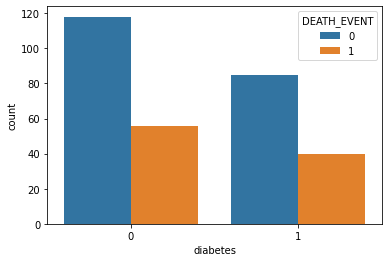

In [16]:
sns.countplot(x='diabetes',data=df, hue = 'DEATH_EVENT')

Checking if daibetes is important feature or not

In [28]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [29]:
59/(115+59)

0.3390804597701149

In [30]:
40/(85+40)

0.32

Since the ratio of death_event with no diabetes is greater than the ratio of death_event with diabetes, so diabetes is not important feature. 

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

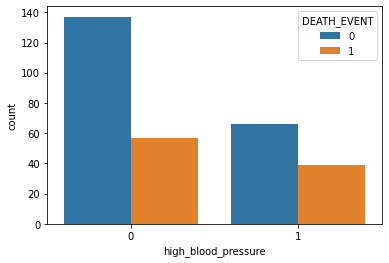

In [19]:
sns.countplot(x='high_blood_pressure', data=df, hue='DEATH_EVENT' )

Checking if high_blood_pressure is important feature or not

In [31]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [41]:
59/(135+94)

0.2576419213973799

In [42]:
39/(65+39)

0.375

Since the ratio of death_event with high_blood_pressure is greater than the ratio of death_event with  no high_blood_pressure, so high_blood_pressure is important feature.

<AxesSubplot:xlabel='anaemia', ylabel='count'>

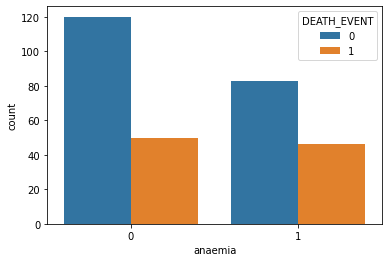

In [35]:
sns.countplot(x='anaemia', data=df, hue='DEATH_EVENT' )

Checking if anaemia is important feature or not

In [36]:
50/(50+46)

0.5208333333333334

In [37]:
46/(50+46)

0.4791666666666667

In [38]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [39]:
50/170

0.29411764705882354

In [40]:
46/129

0.35658914728682173

Since the ratio of death_event with anemia is greater than the ratio of death_event with no anemia, so anemia is important feature.

Separating the features and target

In [43]:
x = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [44]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [45]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

Splitting the data as 70:30 ratio

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=1)

In [84]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [85]:
y_train.head()

14     0
210    0
236    0
44     1
163    1
Name: DEATH_EVENT, dtype: int64

In [89]:
y_train.value_counts()

0    139
1     70
Name: DEATH_EVENT, dtype: int64

In [86]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

Fitting the model

In [87]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [88]:
clf.score(x_test,y_test)

0.7888888888888889

In [94]:
pred = clf.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [96]:
pred_heart_failure = pd.DataFrame(pred,columns=['heart failure prediction'])
pred_heart_failure

,heart failure prediction
0,0
1,0
2,0
3,0
4,0
...,...
85,0
86,0
87,0
88,0


In [97]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [98]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.88      0.85        64\n           1       0.65      0.58      0.61        26\n\n    accuracy                           0.79        90\n   macro avg       0.74      0.73      0.73        90\nweighted avg       0.78      0.79      0.78        90\n'

In [99]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.85        64
           1       0.65      0.58      0.61        26

    accuracy                           0.79        90
   macro avg       0.74      0.73      0.73        90
weighted avg       0.78      0.79      0.78        90



In [100]:
x_test.shape

(90, 12)

In [101]:
confusion_matrix(y_test, pred)

array([[56,  8],
       [11, 15]], dtype=int64)

In [102]:
(56+15)/(56+15+8+11)

0.7888888888888889

In [103]:
con_mat = confusion_matrix(y_test, pred)

In [104]:
con_mat

array([[56,  8],
       [11, 15]], dtype=int64)

<AxesSubplot:>

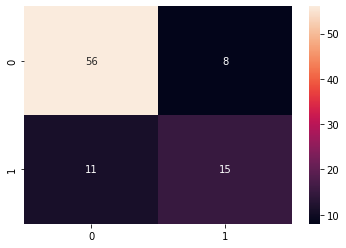

In [105]:
sns.heatmap(con_mat, annot= True)

In [107]:
tp,fn,fp,tn = confusion_matrix(y_test, pred).reshape(-1)

In [108]:
tp

56

In [109]:
fn

8

In [110]:
fp

11

In [111]:
tn

15

# Accuracy : (tp+tn) / (tp+fp+tn+fn)

In [112]:
acc= (tp+tn) / (tp+fp+tn+fn)
acc

0.7888888888888889

# Precision or Positive Predictive Value : tp / (tp+fp)

In [113]:
precision = tp /(tp+fp)
precision

0.835820895522388

# Sensitivity, Recall, Hit rate or True Positive Rate : tp / (tp+fn)

In [114]:
recall = tp / (tp+fn)
recall

0.875

# False Positive Rate or 1- Specificity : fp / (fp + tn)

In [115]:
fpr = fp / (fp + tn)
fpr

0.4230769230769231

# F1 Measure = (precision + reacall) / 2

In [116]:
f1_measure = (precision + recall) / 2
f1_measure

0.855410447761194

# Harmonic Mean or F1 Score

In [117]:
f1_score = (2 * precision * recall) / (precision + recall)
f1_score

0.8549618320610687

# Specificity, Selectivity or True Negative Rate : tn / (tn + fp) 

In [118]:
tnr = tn / (tn + fp)
tnr

0.5769230769230769

# Threat Score or Critical Succes Index : tp / (tp + fp + fn)

In [119]:
csi = tp / (tp + fp +fn)
csi

0.7466666666666667

# False Discovery Rate : fp / ( fp+tp )

In [120]:
fdr = fp / (fp + tp)
fdr

0.16417910447761194

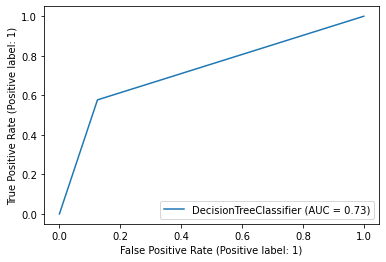

In [122]:
plot_roc_curve(clf, x_test, y_test)

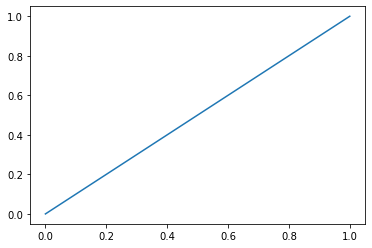

In [133]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1])

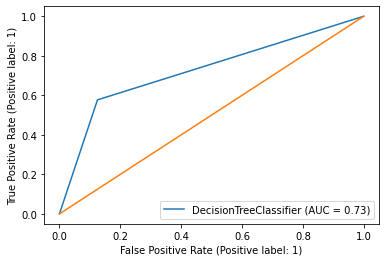

In [134]:
plot_roc_curve(clf, x_test, y_test)
plt.plot([0,1],[0,1])

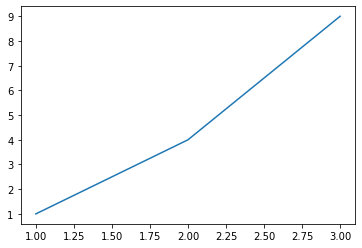

In [137]:
plt.plot([1,2,3],[1,4,9])

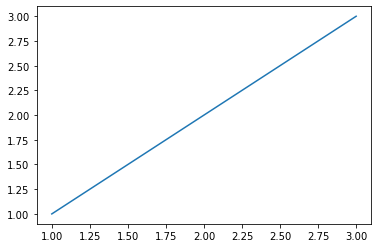

In [138]:
plt.plot([1,2,3],[1,2,3])